In [9]:
import pandas as pd
import numpy as np
import geopandas
import shapely.geometry as geom
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading and Preparing Estimated Trips data

In [10]:
est_trips_data = pd.read_csv('/local/tarciso/data/od-matrix/full/2017_05_01_full_od_trips.csv', parse_dates=['start_time','end_time','leg_duration'])

In [11]:
est_trips_data.head()

,cardNum,user_trip_id,itinerary_id,leg_id,route,busCode,tripNum,from_stop_id,start_time,from_stop_lat,from_stop_lon,to_stop_id,end_time,to_stop_lat,to_stop_lon,leg_duration
0,3823073.0,28150,1,1,827,BC929,12.0,33788.0,2017-05-01 13:35:18,-25.436303,-49.362221,30993.0,2017-05-01 13:44:14,-25.441705,-49.346328,0 days 00:08:56.000000000
1,3823073.0,28150,1,3,303,DE722,4.0,26195.0,2017-05-01 14:02:48,-25.441720,-49.346978,25753.0,2017-05-01 14:12:10,-25.437968,-49.314099,0 days 00:09:22.000000000
2,3807165.0,28153,1,2,304,LL304,5.0,26215.0,2017-05-01 13:36:19,-25.440024,-49.221371,26282.0,2017-05-01 14:01:29,-25.435742,-49.307359,0 days 00:25:10.000000000
3,2715287.0,28154,1,1,684,HA298,11.0,39378.0,2017-05-01 13:35:38,-25.585230,-49.337210,31053.0,2017-05-01 14:01:41,-25.513098,-49.295303,0 days 00:26:03.000000000
4,2715287.0,28154,1,3,603,HD250,6.0,26296.0,2017-05-01 14:07:27,-25.512252,-49.295580,25521.0,2017-05-01 14:32:45,-25.442988,-49.280469,0 days 00:25:18.000000000


### Group trip legs into a single record

In [12]:
est_trips_data.dtypes

cardNum                 float64
user_trip_id              int64
itinerary_id              int64
leg_id                    int64
route                     int64
busCode                  object
tripNum                 float64
from_stop_id            float64
start_time       datetime64[ns]
from_stop_lat           float64
from_stop_lon           float64
to_stop_id              float64
end_time         datetime64[ns]
to_stop_lat             float64
to_stop_lon             float64
leg_duration             object
dtype: object

In [13]:
est_trips_data['date'] = est_trips_data['start_time'].dt.date

In [14]:
est_trips_data.head()

,cardNum,user_trip_id,itinerary_id,leg_id,route,busCode,tripNum,from_stop_id,start_time,from_stop_lat,from_stop_lon,to_stop_id,end_time,to_stop_lat,to_stop_lon,leg_duration,date
0,3823073.0,28150,1,1,827,BC929,12.0,33788.0,2017-05-01 13:35:18,-25.436303,-49.362221,30993.0,2017-05-01 13:44:14,-25.441705,-49.346328,0 days 00:08:56.000000000,2017-05-01
1,3823073.0,28150,1,3,303,DE722,4.0,26195.0,2017-05-01 14:02:48,-25.441720,-49.346978,25753.0,2017-05-01 14:12:10,-25.437968,-49.314099,0 days 00:09:22.000000000,2017-05-01
2,3807165.0,28153,1,2,304,LL304,5.0,26215.0,2017-05-01 13:36:19,-25.440024,-49.221371,26282.0,2017-05-01 14:01:29,-25.435742,-49.307359,0 days 00:25:10.000000000,2017-05-01
3,2715287.0,28154,1,1,684,HA298,11.0,39378.0,2017-05-01 13:35:38,-25.585230,-49.337210,31053.0,2017-05-01 14:01:41,-25.513098,-49.295303,0 days 00:26:03.000000000,2017-05-01
4,2715287.0,28154,1,3,603,HD250,6.0,26296.0,2017-05-01 14:07:27,-25.512252,-49.295580,25521.0,2017-05-01 14:32:45,-25.442988,-49.280469,0 days 00:25:18.000000000,2017-05-01


In [15]:
summarized_trips = est_trips_data.groupby(['cardNum','date','user_trip_id']).agg({'start_time': 'first',
                                                                                  'from_stop_id': 'first',
                                                                                  'from_stop_lat': 'first',
                                                                                  'from_stop_lon': 'first',
                                                                                  'end_time': 'last',
                                                                                  'to_stop_id': 'last',
                                                                                  'to_stop_lat': 'last',
                                                                                  'to_stop_lon': 'last'}) \
                                .reset_index()

In [16]:
summarized_trips.head(10)

,cardNum,date,user_trip_id,start_time,from_stop_id,from_stop_lat,from_stop_lon,end_time,to_stop_id,to_stop_lat,to_stop_lon
0,324934.0,2017-05-01,20302,2017-05-01 11:51:50,32097.0,-25.446517,-49.275789,2017-05-01 11:57:39,26143.0,-25.435056,-49.272818
1,324934.0,2017-05-01,21600,2017-05-01 12:09:13,26364.0,-25.428657,-49.270628,2017-05-01 12:27:33,30828.0,-25.397440,-49.256690
2,324934.0,2017-05-01,57727,2017-05-01 18:47:27,30598.0,-25.397790,-49.258830,2017-05-01 19:09:49,30633.0,-25.440285,-49.277851
3,326014.0,2017-05-01,20457,2017-05-01 11:54:23,31810.0,-25.377197,-49.243294,2017-05-01 12:20:08,28615.0,-25.423600,-49.270049
4,334095.0,2017-05-01,3426,2017-05-01 06:20:33,30702.0,-25.474902,-49.275098,2017-05-01 06:36:25,26631.0,-25.440706,-49.271456
5,338164.0,2017-05-01,17324,2017-05-01 11:12:45,33116.0,-25.401112,-49.329953,2017-05-01 11:37:42,29598.0,-25.428422,-49.273006
6,344357.0,2017-05-01,44906,2017-05-01 16:39:35,25554.0,-25.437670,-49.266682,2017-05-01 17:01:56,26193.0,-25.393661,-49.240634
7,352491.0,2017-05-01,54296,2017-05-01 18:15:57,26281.0,-25.401281,-49.329734,2017-05-01 18:36:55,25896.0,-25.429243,-49.271788
8,352491.0,2017-05-01,67727,2017-05-01 21:32:59,25730.0,-25.441207,-49.275853,2017-05-01 22:33:00,33133.0,-25.400786,-49.330491
9,357578.0,2017-05-01,45171,2017-05-01 16:40:28,25646.0,-25.435618,-49.256635,2017-05-01 16:44:48,25389.0,-25.437593,-49.266727


## Performing spatial join between the trips origin/destination locations and the city zones

### Reading and Preparing Zones data

#### Reading Zones Shape data

In [73]:
def fix_col_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    return(df)

In [58]:
zones_shp = fix_col_names(geopandas.GeoDataFrame.from_file('/local/tarciso/data/pesquisa-od-ctba/shapefiles/181zonas.shp')) \
                .rename(index=str, columns={'densidade_':'densidade'})

In [59]:
zones_shp

,objectid,nm_municip,codigo_zon,viagens_ge,viagens_at,densidade,shape_leng,shape_area,geometry
0,1,ALMIRANTE TAMANDARÉ,101,9299,7984,880,0.318461,0.002693,POLYGON ((-49.29741553499997 -25.2822542629999...
1,2,ALMIRANTE TAMANDARÉ,102,5057,2185,99,0.747371,0.011053,POLYGON ((-49.28261024699998 -25.2283294099999...
2,3,ALMIRANTE TAMANDARÉ,103,11854,9889,1376,0.224234,0.002410,POLYGON ((-49.29659437999993 -25.3252657799999...
3,4,ALMIRANTE TAMANDARÉ,104,21316,10214,4343,0.205634,0.001301,POLYGON ((-49.27108138899996 -25.3133959639999...
4,5,ARAUCÁRIA,111,12954,16097,1344,0.319583,0.002828,POLYGON ((-49.33834275899994 -25.5150800969999...
5,6,ARAUCÁRIA,112,3334,1370,31,1.452795,0.035111,POLYGON ((-49.43590847299998 -25.4806931729999...
6,7,ARAUCÁRIA,113,35395,32825,2881,0.405151,0.004230,POLYGON ((-49.34288563799998 -25.5577095339999...
7,8,BOCAIÚVA DO SUL,121,5386,4496,23,2.562361,0.073963,POLYGON ((-48.57523350799994 -24.9153968819999...
8,9,CAMPINA GRANDE DO SUL,131,12299,13010,1137,0.290286,0.003735,POLYGON ((-49.11864120699994 -25.3044373429999...
9,10,CAMPINA GRANDE DO SUL,132,4773,2720,34,2.446912,0.044558,POLYGON ((-48.62802764899993 -25.0017790979999...


#### Reading Zones Metadata 

In [60]:
zones_df = pd.read_csv('/local/tarciso/data/pesquisa-od-ctba/tables/Zoneamento_Modelacao.csv')

In [61]:
zones_df

,OBJECTID,Shape,NM_MUNICIP,Codigo_Zoneamento,Codigo_Modelacao,Codigo_Macrozona,Shape_Length,Shape_Area
0,1,,PR-092,1201,1201,NaN,0.148748,0.001755
1,2,,BR-476,1210,1210,NaN,0.149229,0.001765
2,3,,PR-510,1212,1212,NaN,0.149119,0.001763
3,4,,BR-277/BR-376,1213,1213,NaN,0.149066,0.001762
4,5,,BR-476,1202,1202,NaN,0.148767,0.001755
5,6,,BR-116,1203,1203,NaN,0.148811,0.001756
6,7,,BR-410,1204,1204,NaN,0.148981,0.001760
7,8,,BR-277,1205,1205,NaN,0.149130,0.001763
8,9,,BR-376,1206,1206,NaN,0.149278,0.001766
9,10,,PR-419,1207,1207,NaN,0.149410,0.001769


In [62]:
zones_df = fix_col_names(zones_df)

In [63]:
zones_clean = zones_df.filter(['codigo_zoneamento','codigo_macrozona','nm_municip']).drop_duplicates() \
                    .rename(index=str, columns={'codigo_zoneamento':'cod_zona','codigo_macrozona':'cod_macrozona','nm_municip':'municipio'})

#### Removing unneeded zones (roads/out-of-bounds)

In [64]:
zones_clean = zones_clean[zones_clean['cod_zona'] < 1200]

In [65]:
len(zones_clean)

181

In [66]:
zones_clean

,cod_zona,cod_macrozona,municipio
15,101,NaN,ALMIRANTE TAMANDARÉ
19,102,NaN,ALMIRANTE TAMANDARÉ
21,103,NaN,ALMIRANTE TAMANDARÉ
24,104,NaN,ALMIRANTE TAMANDARÉ
27,111,NaN,ARAUCÁRIA
30,112,NaN,ARAUCÁRIA
32,113,NaN,ARAUCÁRIA
39,121,NaN,BOCAIÚVA DO SUL
41,131,NaN,CAMPINA GRANDE DO SUL
43,132,NaN,CAMPINA GRANDE DO SUL


#### Joining Zones Shape and Metadata

In [67]:
zones_shp.head()

,objectid,nm_municip,codigo_zon,viagens_ge,viagens_at,densidade,shape_leng,shape_area,geometry
0,1,ALMIRANTE TAMANDARÉ,101,9299,7984,880,0.318461,0.002693,POLYGON ((-49.29741553499997 -25.2822542629999...
1,2,ALMIRANTE TAMANDARÉ,102,5057,2185,99,0.747371,0.011053,POLYGON ((-49.28261024699998 -25.2283294099999...
2,3,ALMIRANTE TAMANDARÉ,103,11854,9889,1376,0.224234,0.002410,POLYGON ((-49.29659437999993 -25.3252657799999...
3,4,ALMIRANTE TAMANDARÉ,104,21316,10214,4343,0.205634,0.001301,POLYGON ((-49.27108138899996 -25.3133959639999...
4,5,ARAUCÁRIA,111,12954,16097,1344,0.319583,0.002828,POLYGON ((-49.33834275899994 -25.5150800969999...


In [68]:
zones_clean.head()

,cod_zona,cod_macrozona,municipio
15,101,NaN,ALMIRANTE TAMANDARÉ
19,102,NaN,ALMIRANTE TAMANDARÉ
21,103,NaN,ALMIRANTE TAMANDARÉ
24,104,NaN,ALMIRANTE TAMANDARÉ
27,111,NaN,ARAUCÁRIA


In [69]:
zones_data = zones_shp.merge(zones_clean, left_on='codigo_zon',right_on='cod_zona') \
                        .filter(['cod_zona','cod_macrozona','municipio','densidade','geometry'])

In [70]:
zones_data

,cod_zona,cod_macrozona,municipio,densidade,geometry
0,101,NaN,ALMIRANTE TAMANDARÉ,880,POLYGON ((-49.29741553499997 -25.2822542629999...
1,102,NaN,ALMIRANTE TAMANDARÉ,99,POLYGON ((-49.28261024699998 -25.2283294099999...
2,103,NaN,ALMIRANTE TAMANDARÉ,1376,POLYGON ((-49.29659437999993 -25.3252657799999...
3,104,NaN,ALMIRANTE TAMANDARÉ,4343,POLYGON ((-49.27108138899996 -25.3133959639999...
4,111,NaN,ARAUCÁRIA,1344,POLYGON ((-49.33834275899994 -25.5150800969999...
5,112,NaN,ARAUCÁRIA,31,POLYGON ((-49.43590847299998 -25.4806931729999...
6,113,NaN,ARAUCÁRIA,2881,POLYGON ((-49.34288563799998 -25.5577095339999...
7,121,NaN,BOCAIÚVA DO SUL,23,POLYGON ((-48.57523350799994 -24.9153968819999...
8,131,NaN,CAMPINA GRANDE DO SUL,1137,POLYGON ((-49.11864120699994 -25.3044373429999...
9,132,NaN,CAMPINA GRANDE DO SUL,34,POLYGON ((-48.62802764899993 -25.0017790979999...


In [71]:
type(zones_data)

geopandas.geodataframe.GeoDataFrame

In [72]:
zones_data.to_file('/local/tarciso/data/pesquisa-od-ctba/shapefiles/181zonas_metadata.shp')

### Spatially Joining Estimated Trips and Zones data based on origin and destination zone location

#### Transforming Trips dataframe into a geo dataframe

In [26]:
summarized_trips.head()

,cardNum,date,user_trip_id,start_time,from_stop_id,from_stop_lat,from_stop_lon,end_time,to_stop_id,to_stop_lat,to_stop_lon
0,324934.0,2017-05-01,20302,2017-05-01 11:51:50,32097.0,-25.446517,-49.275789,2017-05-01 11:57:39,26143.0,-25.435056,-49.272818
1,324934.0,2017-05-01,21600,2017-05-01 12:09:13,26364.0,-25.428657,-49.270628,2017-05-01 12:27:33,30828.0,-25.397440,-49.256690
2,324934.0,2017-05-01,57727,2017-05-01 18:47:27,30598.0,-25.397790,-49.258830,2017-05-01 19:09:49,30633.0,-25.440285,-49.277851
3,326014.0,2017-05-01,20457,2017-05-01 11:54:23,31810.0,-25.377197,-49.243294,2017-05-01 12:20:08,28615.0,-25.423600,-49.270049
4,334095.0,2017-05-01,3426,2017-05-01 06:20:33,30702.0,-25.474902,-49.275098,2017-05-01 06:36:25,26631.0,-25.440706,-49.271456


In [27]:
summarized_trips['from_loc'] = list(zip(summarized_trips.from_stop_lon, summarized_trips.from_stop_lat))
summarized_trips['to_loc'] = list(zip(summarized_trips.to_stop_lon, summarized_trips.to_stop_lat))

In [28]:
summarized_trips['from_loc'] = summarized_trips['from_loc'].apply(geom.Point)
summarized_trips['to_loc'] = summarized_trips['to_loc'].apply(geom.Point)

In [29]:
trips_od_gdf = geopandas.GeoDataFrame(summarized_trips, geometry='from_loc', crs=zones_data.crs)

In [30]:
trips_od_gdf.head()

,cardNum,date,user_trip_id,start_time,from_stop_id,from_stop_lat,from_stop_lon,end_time,to_stop_id,to_stop_lat,to_stop_lon,from_loc,to_loc
0,324934.0,2017-05-01,20302,2017-05-01 11:51:50,32097.0,-25.446517,-49.275789,2017-05-01 11:57:39,26143.0,-25.435056,-49.272818,POINT (-49.27578884477001 -25.446516767314),POINT (-49.27281847696801 -25.435056489364)
1,324934.0,2017-05-01,21600,2017-05-01 12:09:13,26364.0,-25.428657,-49.270628,2017-05-01 12:27:33,30828.0,-25.397440,-49.256690,POINT (-49.270628274626 -25.428656831997),POINT (-49.25669 -25.39744)
2,324934.0,2017-05-01,57727,2017-05-01 18:47:27,30598.0,-25.397790,-49.258830,2017-05-01 19:09:49,30633.0,-25.440285,-49.277851,POINT (-49.25883 -25.39779),POINT (-49.277851463503 -25.440284802082)
3,326014.0,2017-05-01,20457,2017-05-01 11:54:23,31810.0,-25.377197,-49.243294,2017-05-01 12:20:08,28615.0,-25.423600,-49.270049,POINT (-49.243293705545 -25.377197268479),POINT (-49.270048917478 -25.423600052884)
4,334095.0,2017-05-01,3426,2017-05-01 06:20:33,30702.0,-25.474902,-49.275098,2017-05-01 06:36:25,26631.0,-25.440706,-49.271456,POINT (-49.27509817594901 -25.474901672828),POINT (-49.27145648288701 -25.440705808683)


#### Performing spatial join operation

In [31]:
zones_data.head()

,cod_zona,cod_macrozona,municipio,densidade_,geometry
0,101,NaN,ALMIRANTE TAMANDARÉ,880,POLYGON ((-49.29741553499997 -25.2822542629999...
1,102,NaN,ALMIRANTE TAMANDARÉ,99,POLYGON ((-49.28261024699998 -25.2283294099999...
2,103,NaN,ALMIRANTE TAMANDARÉ,1376,POLYGON ((-49.29659437999993 -25.3252657799999...
3,104,NaN,ALMIRANTE TAMANDARÉ,4343,POLYGON ((-49.27108138899996 -25.3133959639999...
4,111,NaN,ARAUCÁRIA,1344,POLYGON ((-49.33834275899994 -25.5150800969999...


In [32]:
trips_od_gdf.head()

,cardNum,date,user_trip_id,start_time,from_stop_id,from_stop_lat,from_stop_lon,end_time,to_stop_id,to_stop_lat,to_stop_lon,from_loc,to_loc
0,324934.0,2017-05-01,20302,2017-05-01 11:51:50,32097.0,-25.446517,-49.275789,2017-05-01 11:57:39,26143.0,-25.435056,-49.272818,POINT (-49.27578884477001 -25.446516767314),POINT (-49.27281847696801 -25.435056489364)
1,324934.0,2017-05-01,21600,2017-05-01 12:09:13,26364.0,-25.428657,-49.270628,2017-05-01 12:27:33,30828.0,-25.397440,-49.256690,POINT (-49.270628274626 -25.428656831997),POINT (-49.25669 -25.39744)
2,324934.0,2017-05-01,57727,2017-05-01 18:47:27,30598.0,-25.397790,-49.258830,2017-05-01 19:09:49,30633.0,-25.440285,-49.277851,POINT (-49.25883 -25.39779),POINT (-49.277851463503 -25.440284802082)
3,326014.0,2017-05-01,20457,2017-05-01 11:54:23,31810.0,-25.377197,-49.243294,2017-05-01 12:20:08,28615.0,-25.423600,-49.270049,POINT (-49.243293705545 -25.377197268479),POINT (-49.270048917478 -25.423600052884)
4,334095.0,2017-05-01,3426,2017-05-01 06:20:33,30702.0,-25.474902,-49.275098,2017-05-01 06:36:25,26631.0,-25.440706,-49.271456,POINT (-49.27509817594901 -25.474901672828),POINT (-49.27145648288701 -25.440705808683)


In [33]:
trips_od_zones = geopandas.sjoin(trips_od_gdf, 
                                        zones_data.add_suffix('_o').rename(index=str,columns={'geometry_o':'geometry'}),
                                        how='left',
                                        op='within') \
                                .drop('index_right', axis=1)

In [34]:
trips_od_zones

,cardNum,date,user_trip_id,start_time,from_stop_id,from_stop_lat,from_stop_lon,end_time,to_stop_id,to_stop_lat,to_stop_lon,from_loc,to_loc,cod_zona_o,cod_macrozona_o,municipio_o,densidade__o
0,324934.0,2017-05-01,20302,2017-05-01 11:51:50,32097.0,-25.446517,-49.275789,2017-05-01 11:57:39,26143.0,-25.435056,-49.272818,POINT (-49.27578884477001 -25.446516767314),POINT (-49.27281847696801 -25.435056489364),371,2.0,CURITIBA,27437
1,324934.0,2017-05-01,21600,2017-05-01 12:09:13,26364.0,-25.428657,-49.270628,2017-05-01 12:27:33,30828.0,-25.397440,-49.256690,POINT (-49.270628274626 -25.428656831997),POINT (-49.25669 -25.39744),301,1.0,CURITIBA,22876
2,324934.0,2017-05-01,57727,2017-05-01 18:47:27,30598.0,-25.397790,-49.258830,2017-05-01 19:09:49,30633.0,-25.440285,-49.277851,POINT (-49.25883 -25.39779),POINT (-49.277851463503 -25.440284802082),421,1.0,CURITIBA,8932
3,326014.0,2017-05-01,20457,2017-05-01 11:54:23,31810.0,-25.377197,-49.243294,2017-05-01 12:20:08,28615.0,-25.423600,-49.270049,POINT (-49.243293705545 -25.377197268479),POINT (-49.270048917478 -25.423600052884),801,5.0,CURITIBA,9498
4,334095.0,2017-05-01,3426,2017-05-01 06:20:33,30702.0,-25.474902,-49.275098,2017-05-01 06:36:25,26631.0,-25.440706,-49.271456,POINT (-49.27509817594901 -25.474901672828),POINT (-49.27145648288701 -25.440705808683),541,2.0,CURITIBA,12337
5,338164.0,2017-05-01,17324,2017-05-01 11:12:45,33116.0,-25.401112,-49.329953,2017-05-01 11:37:42,29598.0,-25.428422,-49.273006,POINT (-49.32995291464599 -25.401112076888),POINT (-49.273006265878 -25.428421853753),903,4.0,CURITIBA,5632
6,344357.0,2017-05-01,44906,2017-05-01 16:39:35,25554.0,-25.437670,-49.266682,2017-05-01 17:01:56,26193.0,-25.393661,-49.240634,POINT (-49.266681661447 -25.437670038693),POINT (-49.24063428764 -25.39366084452001),303,1.0,CURITIBA,23442
7,352491.0,2017-05-01,54296,2017-05-01 18:15:57,26281.0,-25.401281,-49.329734,2017-05-01 18:36:55,25896.0,-25.429243,-49.271788,POINT (-49.329734107491 -25.401281017147),POINT (-49.271788330025 -25.429243252498),903,4.0,CURITIBA,5632
8,352491.0,2017-05-01,67727,2017-05-01 21:32:59,25730.0,-25.441207,-49.275853,2017-05-01 22:33:00,33133.0,-25.400786,-49.330491,POINT (-49.275852571199 -25.441207339035),POINT (-49.330491368106 -25.400785716349),303,1.0,CURITIBA,23442
9,357578.0,2017-05-01,45171,2017-05-01 16:40:28,25646.0,-25.435618,-49.256635,2017-05-01 16:44:48,25389.0,-25.437593,-49.266727,POINT (-49.256634944672 -25.435617512424),POINT (-49.26672726 -25.43759253),351,1.0,CURITIBA,2838


In [35]:
trips_od_zones = geopandas.sjoin(trips_od_zones.set_geometry('to_loc'),
                                 zones_data.add_suffix('_d').rename(index=str,columns={'geometry_d':'geometry'}),
                                            how='left',
                                            op='within') \
                                .drop('index_right', axis=1)

In [36]:
trips_od_zones

,cardNum,date,user_trip_id,start_time,from_stop_id,from_stop_lat,from_stop_lon,end_time,to_stop_id,to_stop_lat,...,from_loc,to_loc,cod_zona_o,cod_macrozona_o,municipio_o,densidade__o,cod_zona_d,cod_macrozona_d,municipio_d,densidade__d
0,324934.0,2017-05-01,20302,2017-05-01 11:51:50,32097.0,-25.446517,-49.275789,2017-05-01 11:57:39,26143.0,-25.435056,...,POINT (-49.27578884477001 -25.446516767314),POINT (-49.27281847696801 -25.435056489364),371,2.0,CURITIBA,27437,303,1.0,CURITIBA,23442
1,324934.0,2017-05-01,21600,2017-05-01 12:09:13,26364.0,-25.428657,-49.270628,2017-05-01 12:27:33,30828.0,-25.397440,...,POINT (-49.270628274626 -25.428656831997),POINT (-49.25669 -25.39744),301,1.0,CURITIBA,22876,441,1.0,CURITIBA,11530
2,324934.0,2017-05-01,57727,2017-05-01 18:47:27,30598.0,-25.397790,-49.258830,2017-05-01 19:09:49,30633.0,-25.440285,...,POINT (-49.25883 -25.39779),POINT (-49.277851463503 -25.440284802082),421,1.0,CURITIBA,8932,303,1.0,CURITIBA,23442
3,326014.0,2017-05-01,20457,2017-05-01 11:54:23,31810.0,-25.377197,-49.243294,2017-05-01 12:20:08,28615.0,-25.423600,...,POINT (-49.243293705545 -25.377197268479),POINT (-49.270048917478 -25.423600052884),801,5.0,CURITIBA,9498,321,1.0,CURITIBA,11111
4,334095.0,2017-05-01,3426,2017-05-01 06:20:33,30702.0,-25.474902,-49.275098,2017-05-01 06:36:25,26631.0,-25.440706,...,POINT (-49.27509817594901 -25.474901672828),POINT (-49.27145648288701 -25.440705808683),541,2.0,CURITIBA,12337,362,1.0,CURITIBA,13203
5,338164.0,2017-05-01,17324,2017-05-01 11:12:45,33116.0,-25.401112,-49.329953,2017-05-01 11:37:42,29598.0,-25.428422,...,POINT (-49.32995291464599 -25.401112076888),POINT (-49.273006265878 -25.428421853753),903,4.0,CURITIBA,5632,311,1.0,CURITIBA,8038
6,344357.0,2017-05-01,44906,2017-05-01 16:39:35,25554.0,-25.437670,-49.266682,2017-05-01 17:01:56,26193.0,-25.393661,...,POINT (-49.266681661447 -25.437670038693),POINT (-49.24063428764 -25.39366084452001),303,1.0,CURITIBA,23442,631,5.0,CURITIBA,9862
7,352491.0,2017-05-01,54296,2017-05-01 18:15:57,26281.0,-25.401281,-49.329734,2017-05-01 18:36:55,25896.0,-25.429243,...,POINT (-49.329734107491 -25.401281017147),POINT (-49.271788330025 -25.429243252498),903,4.0,CURITIBA,5632,301,1.0,CURITIBA,22876
8,352491.0,2017-05-01,67727,2017-05-01 21:32:59,25730.0,-25.441207,-49.275853,2017-05-01 22:33:00,33133.0,-25.400786,...,POINT (-49.275852571199 -25.441207339035),POINT (-49.330491368106 -25.400785716349),303,1.0,CURITIBA,23442,903,4.0,CURITIBA,5632
9,357578.0,2017-05-01,45171,2017-05-01 16:40:28,25646.0,-25.435618,-49.256635,2017-05-01 16:44:48,25389.0,-25.437593,...,POINT (-49.256634944672 -25.435617512424),POINT (-49.26672726 -25.43759253),351,1.0,CURITIBA,2838,303,1.0,CURITIBA,23442


In [37]:
trips_od_zones[pd.isnull(trips_od_zones['cod_zona_d'])]

,cardNum,date,user_trip_id,start_time,from_stop_id,from_stop_lat,from_stop_lon,end_time,to_stop_id,to_stop_lat,...,from_loc,to_loc,cod_zona_o,cod_macrozona_o,municipio_o,densidade__o,cod_zona_d,cod_macrozona_d,municipio_d,densidade__d


In [38]:
trips_od_zones.dtypes

cardNum                   float64
date                       object
user_trip_id                int64
start_time         datetime64[ns]
from_stop_id              float64
from_stop_lat             float64
from_stop_lon             float64
end_time           datetime64[ns]
to_stop_id                float64
to_stop_lat               float64
to_stop_lon               float64
from_loc                   object
to_loc                     object
cod_zona_o                  int64
cod_macrozona_o           float64
municipio_o                object
densidade__o                int64
cod_zona_d                  int64
cod_macrozona_d           float64
municipio_d                object
densidade__d                int64
dtype: object

#### Visual Validation

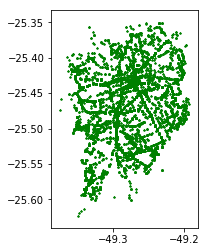

In [39]:
trips_od_zones.plot(marker='*', color='green', markersize=3)

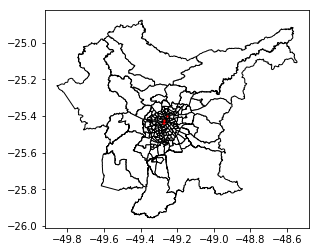

In [40]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
zones_data.plot(ax=ax, color='white', edgecolor='black')
trips_od_zones.loc[1:5,].plot(ax=ax, marker='o', color='red', markersize=1)
plt.show()

In [41]:
trips_od_gdf.geometry.name

'from_loc'

In [42]:
trips_od_zones_test = geopandas.sjoin(trips_od_gdf.loc[1:10,], 
                                        zones_data.add_suffix('_o').rename(index=str,columns={'geometry_o':'geometry'}),
                                        how='inner',
                                        op='within') \
                                .drop('index_right', axis=1) \
                                .merge(zones_data, left_on='cod_zona_o', right_on='cod_zona', how='inner') \
                                .drop(['cod_zona','cod_macrozona','municipio','densidade_'], axis=1)

In [43]:
trips_od_zones_test.loc[1:5,]

,cardNum,date,user_trip_id,start_time,from_stop_id,from_stop_lat,from_stop_lon,end_time,to_stop_id,to_stop_lat,to_stop_lon,from_loc,to_loc,cod_zona_o,cod_macrozona_o,municipio_o,densidade__o,geometry
1,324934.0,2017-05-01,57727,2017-05-01 18:47:27,30598.0,-25.397790,-49.258830,2017-05-01 19:09:49,30633.0,-25.440285,-49.277851,POINT (-49.25883 -25.39779),POINT (-49.277851463503 -25.440284802082),421,1.0,CURITIBA,8932,POLYGON ((-49.25814201599997 -25.3945312479999...
2,326014.0,2017-05-01,20457,2017-05-01 11:54:23,31810.0,-25.377197,-49.243294,2017-05-01 12:20:08,28615.0,-25.423600,-49.270049,POINT (-49.243293705545 -25.377197268479),POINT (-49.270048917478 -25.423600052884),801,5.0,CURITIBA,9498,POLYGON ((-49.23827266699993 -25.3674514489999...
3,334095.0,2017-05-01,3426,2017-05-01 06:20:33,30702.0,-25.474902,-49.275098,2017-05-01 06:36:25,26631.0,-25.440706,-49.271456,POINT (-49.27509817594901 -25.474901672828),POINT (-49.27145648288701 -25.440705808683),541,2.0,CURITIBA,12337,POLYGON ((-49.27066039699997 -25.4741607189999...
4,338164.0,2017-05-01,17324,2017-05-01 11:12:45,33116.0,-25.401112,-49.329953,2017-05-01 11:37:42,29598.0,-25.428422,-49.273006,POINT (-49.32995291464599 -25.401112076888),POINT (-49.273006265878 -25.428421853753),903,4.0,CURITIBA,5632,POLYGON ((-49.31847809099997 -25.3955814109999...
5,352491.0,2017-05-01,54296,2017-05-01 18:15:57,26281.0,-25.401281,-49.329734,2017-05-01 18:36:55,25896.0,-25.429243,-49.271788,POINT (-49.329734107491 -25.401281017147),POINT (-49.271788330025 -25.429243252498),903,4.0,CURITIBA,5632,POLYGON ((-49.31847809099997 -25.3955814109999...


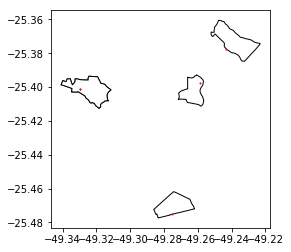

In [44]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
trips_od_zones_test.set_geometry('geometry').loc[1:5,].plot(ax=ax, color='white', edgecolor='black')
trips_od_zones_test.set_geometry('from_loc').loc[1:5,].plot(ax=ax, marker='o', color='red', markersize=1)
plt.show()

## Generating Estimated Trips OD Matrix for Macrozones

In [45]:
trips_od_zones.head()

,cardNum,date,user_trip_id,start_time,from_stop_id,from_stop_lat,from_stop_lon,end_time,to_stop_id,to_stop_lat,...,from_loc,to_loc,cod_zona_o,cod_macrozona_o,municipio_o,densidade__o,cod_zona_d,cod_macrozona_d,municipio_d,densidade__d
0,324934.0,2017-05-01,20302,2017-05-01 11:51:50,32097.0,-25.446517,-49.275789,2017-05-01 11:57:39,26143.0,-25.435056,...,POINT (-49.27578884477001 -25.446516767314),POINT (-49.27281847696801 -25.435056489364),371,2.0,CURITIBA,27437,303,1.0,CURITIBA,23442
1,324934.0,2017-05-01,21600,2017-05-01 12:09:13,26364.0,-25.428657,-49.270628,2017-05-01 12:27:33,30828.0,-25.397440,...,POINT (-49.270628274626 -25.428656831997),POINT (-49.25669 -25.39744),301,1.0,CURITIBA,22876,441,1.0,CURITIBA,11530
2,324934.0,2017-05-01,57727,2017-05-01 18:47:27,30598.0,-25.397790,-49.258830,2017-05-01 19:09:49,30633.0,-25.440285,...,POINT (-49.25883 -25.39779),POINT (-49.277851463503 -25.440284802082),421,1.0,CURITIBA,8932,303,1.0,CURITIBA,23442
3,326014.0,2017-05-01,20457,2017-05-01 11:54:23,31810.0,-25.377197,-49.243294,2017-05-01 12:20:08,28615.0,-25.423600,...,POINT (-49.243293705545 -25.377197268479),POINT (-49.270048917478 -25.423600052884),801,5.0,CURITIBA,9498,321,1.0,CURITIBA,11111
4,334095.0,2017-05-01,3426,2017-05-01 06:20:33,30702.0,-25.474902,-49.275098,2017-05-01 06:36:25,26631.0,-25.440706,...,POINT (-49.27509817594901 -25.474901672828),POINT (-49.27145648288701 -25.440705808683),541,2.0,CURITIBA,12337,362,1.0,CURITIBA,13203


In [46]:
len(trips_od_zones)

17569

In [47]:
est_macrozones_trips = trips_od_zones.groupby(['cod_macrozona_o','cod_macrozona_d']).cardNum.count().reset_index(name='num_pass')

In [48]:
est_macrozones_trips

,cod_macrozona_o,cod_macrozona_d,num_pass
0,1.0,1.0,981
1,1.0,2.0,370
2,1.0,3.0,537
3,1.0,4.0,302
4,1.0,5.0,708
5,1.0,6.0,469
6,1.0,7.0,202
7,1.0,8.0,195
8,1.0,9.0,161
9,1.0,10.0,99


In [49]:
est_macrozones_freqs = est_macrozones_trips.pivot(index='cod_macrozona_o',columns='cod_macrozona_d',values='num_pass')

In [50]:
est_macrozones_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,981,370,537,302,708,469,202,195,161,99
2.0,452,373,118,112,93,276,354,371,225,200
3.0,758,124,305,65,101,135,57,56,43,19
4.0,386,92,25,239,41,13,33,94,21,17
5.0,808,74,94,68,310,39,26,38,18,13
6.0,597,270,148,42,53,399,141,84,118,61
7.0,350,286,50,55,33,133,177,139,152,156
8.0,265,352,41,161,27,82,122,219,56,97
9.0,333,205,49,32,20,140,138,48,113,57


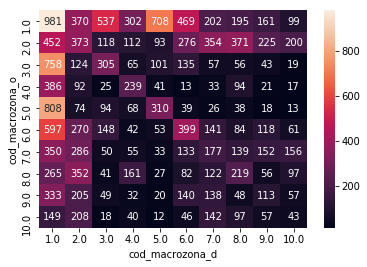

In [51]:
sns.heatmap(est_macrozones_freqs, annot=True, fmt="d")

In [52]:
est_macrozones_norm_freqs = est_macrozones_freqs/est_macrozones_freqs.values.sum()

In [53]:
est_macrozones_norm_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,0.055984,0.021115,0.030645,0.017234,0.040404,0.026765,0.011528,0.011128,0.009188,0.005650
2.0,0.025795,0.021286,0.006734,0.006392,0.005307,0.015751,0.020202,0.021172,0.012840,0.011414
3.0,0.043257,0.007076,0.017406,0.003709,0.005764,0.007704,0.003253,0.003196,0.002454,0.001084
4.0,0.022028,0.005250,0.001427,0.013639,0.002340,0.000742,0.001883,0.005364,0.001198,0.000970
5.0,0.046111,0.004223,0.005364,0.003881,0.017691,0.002226,0.001484,0.002169,0.001027,0.000742
6.0,0.034070,0.015408,0.008446,0.002397,0.003025,0.022770,0.008047,0.004794,0.006734,0.003481
7.0,0.019974,0.016321,0.002853,0.003139,0.001883,0.007590,0.010101,0.007932,0.008674,0.008903
8.0,0.015123,0.020088,0.002340,0.009188,0.001541,0.004680,0.006962,0.012498,0.003196,0.005536
9.0,0.019004,0.011699,0.002796,0.001826,0.001141,0.007989,0.007875,0.002739,0.006449,0.003253


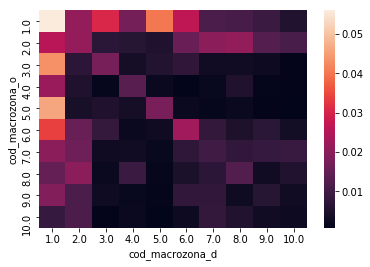

In [54]:
sns.heatmap(est_macrozones_norm_freqs)

## Generating Estimated Trips OD Matrix for Zones

In [55]:
est_zones_trips = trips_od_zones.groupby(['cod_zona_o','cod_zona_d']).cardNum.count().reset_index(name='num_pass')

In [56]:
est_zones_trips

,cod_zona_o,cod_zona_d,num_pass
0,103,311,2
1,103,401,1
2,103,441,1
3,103,521,1
4,103,601,1
5,103,602,2
6,103,621,1
7,103,631,1
8,103,701,1
9,103,711,2


In [57]:
est_zones_freqs = est_zones_trips.pivot(index='cod_zona_o',columns='cod_zona_d',values='num_pass').fillna(0)

In [58]:
est_zones_freqs

cod_zona_d,103,166,301,302,303,311,321,331,341,351,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
103,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,19.0,...,1.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,5.0,1.0
302,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
303,0.0,1.0,2.0,5.0,14.0,0.0,16.0,5.0,6.0,75.0,...,6.0,1.0,1.0,0.0,3.0,6.0,15.0,12.0,40.0,16.0
311,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
321,1.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
331,0.0,0.0,3.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


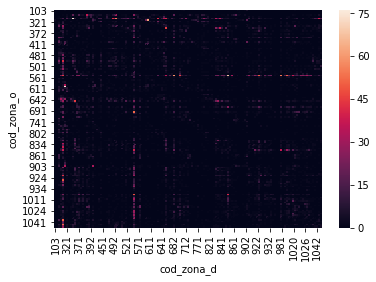

In [59]:
sns.heatmap(est_zones_freqs)

In [60]:
est_zones_norm_freqs = est_zones_freqs/est_zones_freqs.values.sum()

In [61]:
est_zones_norm_freqs

cod_zona_d,103,166,301,302,303,311,321,331,341,351,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
152,0.000057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
301,0.000000,0.000000,0.000000,0.000000,0.000057,0.000000,0.000114,0.000000,0.000114,0.001081,...,0.000057,0.000000,0.000057,0.000057,0.000114,0.000000,0.000057,0.000000,0.000285,0.000057
302,0.000000,0.000000,0.000057,0.000000,0.000000,0.000000,0.000171,0.000000,0.000057,0.000000,...,0.000000,0.000000,0.000000,0.000057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
303,0.000000,0.000057,0.000114,0.000285,0.000797,0.000000,0.000911,0.000285,0.000342,0.004269,...,0.000342,0.000057,0.000057,0.000000,0.000171,0.000342,0.000854,0.000683,0.002277,0.000911
311,0.000171,0.000000,0.000000,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
321,0.000057,0.000000,0.000057,0.000000,0.000342,0.000000,0.000000,0.000000,0.000171,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000057
331,0.000000,0.000000,0.000171,0.000000,0.000512,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


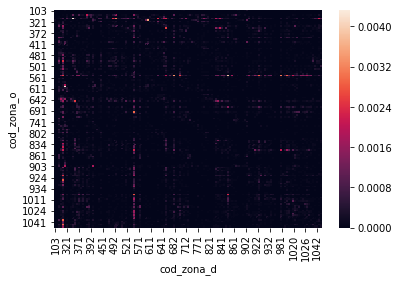

In [62]:
sns.heatmap(est_zones_norm_freqs)